In [137]:
import numpy as np
import matplotlib.pyplot as plt

In [138]:
data = np.array([[40,20],
                 [55,30],
                 [70,60],
                 [50,35],
                 [45,40],
                 [62,75],
                 [45,30],
                 [68,80],
                 [80,70],
                 [75,90]])

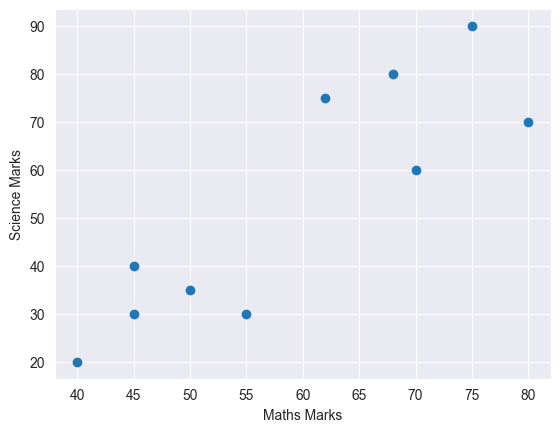

In [139]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Maths Marks")
plt.ylabel("Science Marks")
plt.show()

In [140]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data)
print(scaled_data)

[[-1.43299332 -1.39951173]
 [-0.3016828  -0.97541727]
 [ 0.82962771  0.29686613]
 [-0.67878631 -0.76337004]
 [-1.05588981 -0.5513228 ]
 [ 0.2262621   0.93300782]
 [-1.05588981 -0.97541727]
 [ 0.67878631  1.14505506]
 [ 1.58383472  0.72096059]
 [ 1.20673122  1.56914952]]


In [141]:
from sklearn.decomposition import PCA

In [142]:
pca = PCA(n_components=1)
pca.fit(scaled_data)

,n_components,1
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [143]:
pca.explained_variance_ratio_

array([0.93500282])

In [144]:
pca_scaled_data = pca.transform(scaled_data)

In [145]:
scaled_data.shape

(10, 2)

In [146]:
pca_scaled_data.shape

(10, 1)

In [147]:
pca_scaled_data = pca.inverse_transform(pca_scaled_data)

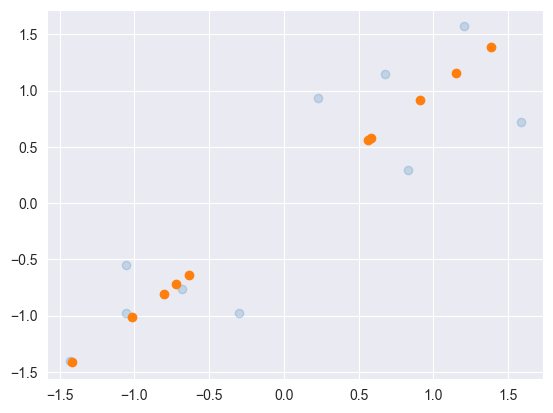

In [148]:
plt.scatter(scaled_data[:,0], scaled_data[:,1],alpha=0.2)
plt.scatter(pca_scaled_data[:,0],pca_scaled_data[:,1])

PCA for visualization


In [149]:
from sklearn.datasets import load_digits
digits = load_digits()

In [150]:
digits.data.shape

(1797, 64)

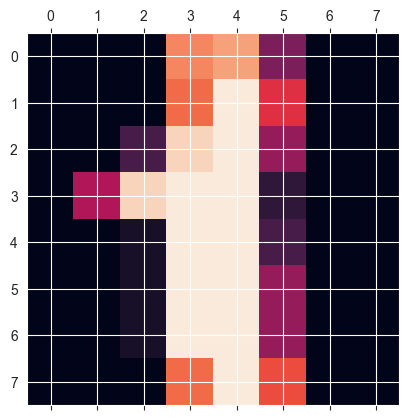

In [151]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[1])
plt.show()

In [152]:
digits.target[33]

np.int64(5)

In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
new_digits = pca.fit_transform(digits.data)

In [154]:
new_digits.shape

(1797, 10)

In [155]:
digits.data.shape

(1797, 64)

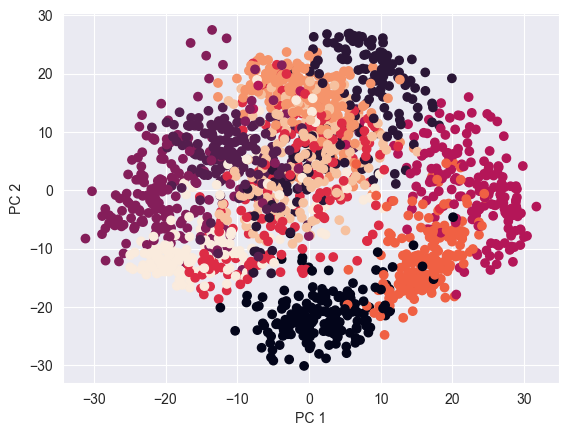

In [156]:
import matplotlib.pyplot as plt
plt.scatter(new_digits[:,0],new_digits[:,1],c=digits.target)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

PCA for speedup models

In [157]:
from sklearn.datasets import load_digits
import numpy as np

In [158]:
digits = load_digits()

In [159]:
digits.data.shape

(1797, 64)

In [160]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data = sc.fit_transform(digits.data)

In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
new_data_pca = pca.fit_transform(new_data)

In [162]:
new_data_pca.shape

(1797, 10)

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_data,digits.target,test_size=0.2,random_state=42)

In [164]:
x_test.shape

(360, 64)

In [165]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=10000)

import time
start = time.time()
model.fit(x_train,y_train)
end = time.time()

print((end - start)*1000)

34.44695472717285


In [168]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9722222222222222